# Assignment #1 

#### Machine Learning in Korea University
#### COSE362, Fall 2018 (Prof. Jaewoo Kang)
#### Due : 11/6 (TUE) 11:59 PM









#### In this assignment, you will learn model selection process among various hyperparameters.
* Implementation detail: Anaconda 5.3 with python 3.7
* Use given dataset. Please do not change training / validation / test split.
* Use numpy, scikit-learn, and matplotlib library

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1. Linear Regression with Feature Selection
In this example we will conduct featrue selection process in linear regression model. <br>
You will use data in 'LinReg' directory for this example. <br>
Please perform the following steps. 
> 0. Preprocess: Change given dataset into input array for scikit-learn model.
> 1. Feture selection : perform greedy feature selection.
> 2. Plot: plot validation and train error against number of feature.
> 3. Model selection and evaluation: Select best model and perform evaluation on test dataset



### 1-0. Preprocess
Load dataset and process it into appropriate array form.
* Example <br>
> For linear regression problem, the datasets are described onto 'dev_sample.npy', 'dev_label.npy', 'test_sample.npy', 'test_label.npy' in 'LinReg' folder. <br>
> Load these datasets onto <b>X_dev, y_dev, X_test, y_test</b>. <br>
> You may need to use numpy.load function

In [2]:
# Load linear regression datasets
# Your code here
X_dev = np.load("./LinReg/dev_sample.npy")
y_dev = np.load("./LinReg/dev_label.npy")
X_test = np.load("./LinReg/test_sample.npy")
y_test = np.load("./LinReg/test_label.npy")
# End your code

### 1-1. Feature selection
Build linear regression models with different number of features. (1 ~ 100)<br>
Please use <b>cross validation</b>, <b>greedy approach</b> for feature selection until choose optimal number of features. <br> 

* For cross validaton, you need to split your development set into 5-fold. This is implemented into class <b>cv</b>.
* Feature selection example : Input with 10 features
> Call 10 features as #1, #2, #3, ..., #10 <br>
> First build 10 models with only one feature. 
> Compare model with #1, model with #2, ... , model with #10 <br>
> Choose feature of the best model. (for example, #1 is the best) <br>
> Build model with 2 features. (#1, #2), (#1, #3), ..., (#1, #10). <br>
> Then, add feature with the best performance. <br>
> And so on...

<b>For the next step, please save validation and train error of the best model for each number of selected features.



In [3]:
# Define linear regression function
# You may use sklearn.linear_model.LinearRegression

# Your code here
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#create linear regression model
regr = linear_model.LinearRegression()
# End your code

# Basic settings. DO NOT MODIFY
selected_feature = []
sel_num = 100
valid_split = 1/5
cv = ShuffleSplit(n_splits=5, test_size=valid_split, random_state=0)

selected_train_error = []
selected_valid_error = []

# For greedy selection
min_valid_dict = {}
for sel in range(sel_num) :
    min_train_error = +1000
    min_valid_error = +1000
    min_feature = 0
    
    # For each feature
    for i in range(X_dev.shape[1]) :
        train_error_ith = []
        valid_error_ith = []
        
        # Select feature greedy
        # Hint : There should be no duplicated feature in selected_feature
        # Your code here
        
        #print(selected_feature + [i])
        temp = selected_feature + [i]
        X_dev_fs = X_dev[:, temp]
        # End your code
        
        
        # For cross validation
        for train_index, test_index in cv.split(X_dev) :
            X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
            y_train, y_valid = y_dev[train_index], y_dev[test_index]
        
            # Derive training error, validation error
            # You may use sklearn.metrics.mean_squared_error, model.fit(), model.predict()
            # Your code here
            
            #Train the model using the training sets
            regr.fit(X_train, y_train)
            
            #print("%dth" % i)
            #The coefficients
            #print('Coefficients: \n', regr.coef_)

            #The mean squared error
            train_error_ith.append(mean_squared_error(regr.predict(X_train), y_train))
            valid_error_ith.append(mean_squared_error(regr.predict(X_valid), y_valid))

            #Explained variance score: 1 is perfect prediction
            #print('Variance score: %.2f' % r2_score(y_test, y_pred))
            # End your code
        
        temp = np.mean(valid_error_ith)
        
        if temp <= min_valid_error:
            if i in selected_feature:
                continue
            
            min_valid_error = temp
            min_train_error = np.mean(train_error_ith)
            min_feature = i
            min_valid_dict.update({i:min_valid_error})
            
            #print("%dth"%i)
            #print(min_train_error)
                
        # Select best performance feature set on each features
        # You should choose the feature which has minimum mean cross validation error
        # Your code here

        # End your code

    print('='*50)
    print("# of selected feature(s) : {}".format(sel+1))
    print("Selected feature of this iteration : {}".format(min_feature))
    selected_feature.append(min_feature)
    selected_train_error.append(min_train_error)
    selected_valid_error.append(min_valid_error)
 

#count = {}
#for num in selected_feature:
#    try: count[num] += 1
#    except: count[num] = 1
#print(count)


# of selected feature(s) : 1
Selected feature of this iteration : 1
# of selected feature(s) : 2
Selected feature of this iteration : 3
# of selected feature(s) : 3
Selected feature of this iteration : 45
# of selected feature(s) : 4
Selected feature of this iteration : 109
# of selected feature(s) : 5
Selected feature of this iteration : 53
# of selected feature(s) : 6
Selected feature of this iteration : 44
# of selected feature(s) : 7
Selected feature of this iteration : 43
# of selected feature(s) : 8
Selected feature of this iteration : 116
# of selected feature(s) : 9
Selected feature of this iteration : 95
# of selected feature(s) : 10
Selected feature of this iteration : 21
# of selected feature(s) : 11
Selected feature of this iteration : 77
# of selected feature(s) : 12
Selected feature of this iteration : 80
# of selected feature(s) : 13
Selected feature of this iteration : 97
# of selected feature(s) : 14
Selected feature of this iteration : 26
# of selected feature(s) : 15

# of selected feature(s) : 69
Selected feature of this iteration : 124
# of selected feature(s) : 70
Selected feature of this iteration : 5
# of selected feature(s) : 71
Selected feature of this iteration : 86
# of selected feature(s) : 72
Selected feature of this iteration : 55
# of selected feature(s) : 73
Selected feature of this iteration : 16
# of selected feature(s) : 74
Selected feature of this iteration : 27
# of selected feature(s) : 75
Selected feature of this iteration : 61
# of selected feature(s) : 76
Selected feature of this iteration : 32
# of selected feature(s) : 77
Selected feature of this iteration : 23
# of selected feature(s) : 78
Selected feature of this iteration : 41
# of selected feature(s) : 79
Selected feature of this iteration : 87
# of selected feature(s) : 80
Selected feature of this iteration : 9
# of selected feature(s) : 81
Selected feature of this iteration : 59
# of selected feature(s) : 82
Selected feature of this iteration : 60
# of selected feature

### 1-2. Plot error
Plot train and validation error against number of features.<br>
After plotting, <b>analyze the result graph.

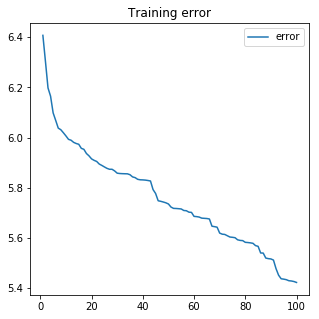

In [4]:
# Train error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_train_error)
plt.title('Training error')
plt.legend(['error'])
plt.show()

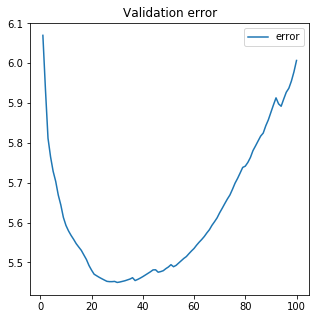

In [5]:
# Validation error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_valid_error)
plt.title('Validation error')
plt.legend(['error'])
plt.show()

### Analyze
Write explanation of graph below. <br>
Analyze the folloing points.
* Trend of each error against number of features
* Meaning of gap between vlidation error and train error
* Meaning of each region in graph
* Others...

# Write description here
1. Training error는 feature 개수가 늘어날수록, 즉 model complexity가 커질수록 줄어듭니다. Validation error는 feature 개수가 약 30개로 늘어날 때까지는 줄어드는 양상을 보이지만, 그 이상으로 feature 개수가 늘어나면 다시 증가합니다. 

2. 이러한 양상을 보이는 이유는, model complexity가 커질수록 주어진 dataset에 overfitting되기 때문입니다. feature개수가 늘어날수록, training sample의 noise까지 학습할 수 있기에 overfitting이 일어나, 일반화에 실패하고, 새로운 sample이 주어졌을 때 성능이 떨어집니다. 이 때문에 training error와 validation error사이의 gap이 발생합니다. 

3. feature개수가 optimal point의 feature 개수보다 적은 지점에서는 training error와 validation error가 모두 낮고, 이는 high bias되었다고 판단할 수 있습니다. feature개수가 optimal point의 feature개수보다 많은 지점에서는 training error는 작지만, validation error는 크므로, 이는 high variance되었다고 판단할 수 있습니다. 



### 1-3. Model selection and evaluation
Select the best model and perform a test on test dataset.<br>
Print the <b>performance on test set</b> with <b>features of the best model.

In [6]:
# Select optimal feature set corresponding the minimum cross validation error
# Your code here
min_verror_index = -1

for (index, error) in enumerate(selected_valid_error):
    if error == np.min(selected_valid_error):
        min_verror_index = index

selected_feature = selected_feature[:min_verror_index+1]
X_dev_fs = X_dev[:,selected_feature]

# End your code

# Basic settings. DO NOT MODIFY
min_train_error = 1000
min_valid_error = 1000
optimal_param = np.array([])

optimal_param = np.zeros(126)

for train_index, test_index in cv.split(X_dev) :
    X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
    y_train, y_valid = y_dev[train_index], y_dev[test_index]
    
    # Derive training error, validation error for each fold
    # For each fold, you need to compare error with previous minimum error.
    # Your code here
    train_error = []
    valid_error = []
    temp_param = np.array([])
    temp_param = np.zeros(126)
   # print("%dth")
    #Train the model using the training sets
    regr.fit(X_train, y_train)
    
    #The mean squared error
    train_error.append(mean_squared_error(regr.predict(X_train), y_train))
    valid_error.append(mean_squared_error(regr.predict(X_valid), y_valid))
   # print(mean_squared_error(regr.predict(X_valid), y_valid))
    
    #The coefficients
 #   print('Coefficients: \n', regr.coef_)
    
    for i in range(len(selected_feature)):
       # print(selected_feature[i])
        temp_param[selected_feature[i]] = regr.coef_[i]
        #print(temp_param)
            
    if(np.mean(valid_error)<min_valid_error):
        min_valid_error = np.mean(valid_error)
        optimal_param = temp_param
        min_train_error = np.mean(train_error)
        
#print("op")
#print(optimal_param)
    # End your code

# Find the best model on each fold
# Derive test error with best performance model
# Your code here
#regr.intercept_ = optimal_param[0]
regr.coef_ = optimal_param[:]
test_error = mean_squared_error(regr.predict(X_test), y_test)
# End your code

# Drop features of final model
print("Results")
print("# of selected features : {}".format(len(selected_feature)))
print("Selected features : ")
print(selected_feature)

# Drop test error and accuracy
print("Training error : {}".format(min_train_error))
print("Validation error : {}".format(min_valid_error))
print("Test error : {}".format(test_error))

Results
# of selected features : 30
Selected features : 
[1, 3, 45, 109, 53, 44, 43, 116, 95, 21, 77, 80, 97, 26, 24, 36, 40, 117, 92, 84, 110, 98, 15, 6, 118, 85, 113, 0, 69, 99]
Training error : 6.085476385088486
Validation error : 4.522828368608628
Test error : 7.679010560715177


## 2. Logistic Regression with Regularizer

In this example you will explore the effect of regularization parameter.<br>
You will use <b>'Heart Disease Dataset'</b> in <b>'LogReg'</b> for this example. <br>

The goal is to predict the presence of heart disease given attributes of a patient.<br>
The presence is integer valued from 0 (no presence) to 4, but you have to only distingush presensence (values 1,2,3,4) from absence (value 0). <br>
Each attribute is described below. <br>

> 1. age : age in years <br>
> 2. sex : sex (1 = male; 0 = female) <br>
> 3. cp : chest pain type <br>
-- Value 1: typical angina <br>
-- Value 2: atypical angina <br>
-- Value 3: non-anginal pain <br>
-- Value 4: asymptomatic  <br>
> 4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)  <br>
> 5. chol : serum cholestoral in mg/dl  <br>
> 6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
> 7. restecg  : resting electrocardiographic results <br>
-- Value 0: normal <br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
> 8. thalach : maximum heart rate achieved <br>
> 9. exang : exercise induced angina (1 = yes; 0 = no) <br>
> 10. oldpeak : ST depression induced by exercise relative to rest <br>
> 11. slope : the slope of the peak exercise ST segment <br>
-- Value 1: upsloping <br>
-- Value 2: flat <br>
-- Value 3: downsloping  <br>
> 12. ca : number of major vessels (0-3) colored by flourosopy  <br>
> 13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect  <br>


### 2-0. Preprocess

Firstly, read training, validation and test datasets respectively. <br>


In [7]:

def read_data(data_type):
    f = open('./LogReg/' + data_type + '.data', 'r')

    X, Y = [],[]
    while True:
        line = f.readline()
        if not line: break
        spl = line.split(',')
        x = spl[:-1]
        y = int(spl[-1])
        
        X.append(list(map(float, x)))
        
        # Define the variable 'binary_label'.
        # Note that labels must be 1 or 0.
        # Your code here
        if y == 0:
            binary_label = 0
        else:
            binary_label = 1
        Y.append(binary_label)  # blank
    
    return X, Y

X_tr, Y_tr = read_data('train')
X_va, Y_va = read_data('valid')
X_te, Y_te = read_data('test')


### Normalization and Converting to one-hot vector

Data preprocessing takes several steps after loading data. <br>
1. <b>Normailze</b> numerical values. Normalization is defined as <b><i>normalized_value</i> = (value - mean) / std</b>. <br>
   You should calculate mean and standard deviation (std) on <b> train data </b> and normalize train, valid and test data.
2. For categorical attributes, <b>build dictionaries</b> of each attribute and convert the categorical values to <b>one-hot vectors</b>. <br>
3. Concatenate all the obtained values. <br>

If you have done correctly, you will get results that are same format as below: 
* <b>before</b> : [63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0]
* <b>after</b> : [0.11099784710934087, 0, 1, 1, 0, 0, 0, 0.035386000081823056, -0.005256085700922788, 0, 1, 0, 0, 1, 0.0026598418293161848, 1, 0, 0.6659671864819814, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0] <br>
(The values in the above example can be different from actual values.)<br>

<b>Do not use any library such as sklearn.preprocessing. You can use only Numpy. </b><br>


In [8]:
# Your code here
X_tr = np.asarray(X_tr)
Y_tr = np.asarray(Y_tr)
X_va = np.asarray(X_va)
Y_va = np.asarray(Y_va)
X_te = np.asarray(X_te)
Y_te = np.asarray(Y_te)

#numerical values
numerical_feature = [0,3,4,7,9]
for feature_num in numerical_feature:
    feature_mean = np.mean(X_tr[:,feature_num])
    feature_std = np.std(X_tr[:,feature_num])
    #normalization
    X_tr[:,feature_num] = (X_tr[:,feature_num] - feature_mean) / feature_std
    X_va[:,feature_num] = (X_va[:,feature_num] - feature_mean) / feature_std
    X_te[:,feature_num] = (X_te[:,feature_num] - feature_mean) / feature_std
#categorical values
categorical_feature = [1,2,5,6,8,10,11,12] #2, 3, 6, 7, 9, 11, 12, 13

feature_dict = {}

for feature_num in (categorical_feature):
    X_tr_value = X_tr[:,feature_num]
    X_va_value = X_va[:,feature_num]
    X_te_value = X_te[:,feature_num]
    feature_set = set(X_tr_value)
    
   # print(X_tr_value)
    
    for (i, value) in enumerate(feature_set):
        feature_dict[value] = i
        
    for (i, value) in enumerate(X_tr_value): 
        X_tr_value[i] = feature_dict[value]
    for (i, value) in enumerate(X_va_value):
        X_va_value[i] = feature_dict[value]
    for (i, value) in enumerate(X_te_value):
        X_te_value[i] = feature_dict[value]
    
    #print(X_te_value)
    #print(X_tr_value)
    #print(X_va_value)
    
    nb_class = len(feature_set)
    tr_targets = X_tr_value.astype(int).reshape(-1)
    tr_one_hot_targets = np.eye(nb_class)[tr_targets]
    
    va_targets = X_va_value.astype(int).reshape(-1)
    va_one_hot_targets = np.eye(nb_class)[va_targets]
    
    te_targets = X_te_value.astype(int).reshape(-1)
    te_one_hot_targets = np.eye(nb_class)[te_targets]
    
    #print(tr_one_hot_targets)
    #print(va_one_hot_targets)
    #print(te_one_hot_targets)
    
    X_tr = np.concatenate((X_tr,tr_one_hot_targets),axis = 1)
    X_va = np.concatenate((X_va,va_one_hot_targets),axis = 1)
    X_te = np.concatenate((X_te,te_one_hot_targets),axis = 1)

# Delete previous categorical features
X_tr = np.delete(X_tr, categorical_feature, 1)
X_va = np.delete(X_va, categorical_feature, 1)
X_te = np.delete(X_te, categorical_feature, 1)
# End your code



In [9]:
X_tr.shape, X_va.shape, X_te.shape

((118, 28), (89, 28), (90, 28))

### 2-1. Logistic regression model and regularizer
Build logistic regression model with l2 regularization utilizing sklearn. <br>
Find the optimal coefficient based on <b>cross entropy loss</b> on thet validation set. <br>
Try following regularization parameter settings.
* Regularization parameters = 0.01, 0.05, 0.1, 0.5, 1, 10, 100 <br>
* Note that regluarization parameter for LogisticRegression in sklearn is inverse of true parameter. <br>
  (coef = 0.001 for LogisticRegression   =>  $\lambda$ = 1000 in our course note)
* Your model should be <b>LogisticRegression(C=coef, solver='lbfgs', max_iter=500). </b>
  <br>  <b>Do not change the model setting except C. </b> 
  <br> (coef = each regularization parameter)

In [10]:
# Please use below function
# logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

coefs = [0.01, 0.05, 0.1, 0.5, 1, 10, 100]

opt_coef = 1


# To plot losses on training and validation sets with varied parameter settings, 
# save them on lists.
loss_tr, loss_va = [],[]

# Your code here

for coef in coefs:
    logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)
    logreg.fit(X_tr, Y_tr)
    loss_tr.append(log_loss(Y_tr,logreg.predict_proba(X_tr)))
    loss_va.append(log_loss(Y_va,logreg.predict_proba(X_va)))

# End your code




### 2-2. Plot error
Plot the train and validation loss against given regularization parameter <b>(not inverse)</b>.<br>
<b> Analyze the result.

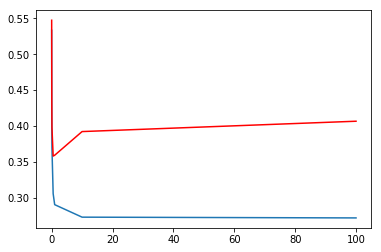

In [11]:
# Do not fix the code!!

plt.plot(coefs, loss_tr, coefs, loss_va, 'r-')
plt.show()

### Analyze 
Write explanation of graph below.

patameter C가 작을수록 regularization이 많이 됩니다. 위의 그래프에서 파란 선은 training error이고, 빨간 선은 validation error를 의미합니다. parameter C가 작을수록 regularization이 많이 되므로, X 값이 증가할수록, regularization은 적게 됨을 알 수 있습니다.

training error는 regularization이 적게 될 수록 줄어들고, validation error의 경우,regularization이 적게 될수록 어느 지점까지는 줄어들지만, 다시 늘어남을 확인할 수 있습니다. 

regularization이 많이 된 지점에서는 training error와 validation error가 모두 높고, 이는 high bias되었다고 판단할 수 있습니다. regularization이 적게 된 지점에서는 training error는 낮지만, validation error는 다시 증가하는 양상을 보이므로, high variance되었다고 판단할 수 있습니다. 

### 2-3. Model selection and evaluation

Drop the performance on test set with the regularization coefficient of the best model.

In [12]:
from sklearn.metrics import accuracy_score
# Your code here

for (i,coef) in enumerate(coefs):
    logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)
    logreg.fit(X_tr, Y_tr)
    loss_tr.append(log_loss(Y_tr,logreg.predict_proba(X_tr)))
    loss_va.append(log_loss(Y_va,logreg.predict_proba(X_va)))
    if loss_va[i] == np.min(loss_va):
        opt_coef = coef

test_logreg = LogisticRegression(C=opt_coef, solver='lbfgs', max_iter=500)
test_logreg.fit(X_tr, Y_tr)
test_loss = log_loss(Y_te,test_logreg.predict_proba(X_te))
test_acc = test_logreg.score(X_te,Y_te)
coef = opt_coef
# End your code


#print regularization paramter of final model and drop test loss and accuracy
print ("Optimal : {}, Loss : {:2.3f}, Accuracy : {:3.2f}".format(coef, test_loss, test_acc*100))

Optimal : 0.5, Loss : 0.370, Accuracy : 84.44
